In [102]:
from functions.functions_turbulence import *

In [103]:
lmbda = 633e-9
L_prop = 150  # ! точно
width0 = 15e-3 / 10  # !? может точно
xy_lim_2D = (-40.0e-3, 40.0e-3)
res_xy_2D = 201
l = 0
p = 0
extend = [*xy_lim_2D, *xy_lim_2D]

In [104]:
beam_par = (l, p, width0, lmbda)
k0 = 2 * np.pi / lmbda
xy_2D = np.linspace(*xy_lim_2D, res_xy_2D)
mesh_2D = np.meshgrid(xy_2D, xy_2D, indexing='ij')
pxl_scale = (xy_lim_2D[1] - xy_lim_2D[0]) / (res_xy_2D - 1)
D_window = (xy_lim_2D[1] - xy_lim_2D[0])
perfect_scale = lmbda * np.sqrt(L_prop ** 2 + (D_window / 2) ** 2) / D_window
print(f'dx={pxl_scale * 1e6: .2f}um, perfect={perfect_scale * 1e6: .2f}um,'
      f' resolution required={math.ceil(D_window / perfect_scale + 1)}')

dx= 400.00um, perfect= 1186.88um, resolution required=69


In [105]:
Cn2 = 1.35e-13
Cn2 = 3.21e-14
r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=L_prop)
print(f'r0 parameter: {r0}')
L0 = 9
l0 = 2e-3  # !!!!!!
psh_par = (r0, res_xy_2D, pxl_scale, L0, l0)

r0 parameter: 0.04154383786882477


In [106]:
screens_num = screens_number(Cn2, k0, dz=L_prop)
print(f'Number of screen required: {screens_num}')

ryt = rytov(Cn2, k0, L_prop)
print(f'SR={np.exp(-ryt)} (Rytov)')

Number of screen required: 0.7294419082738279
SR=0.9454624826329648 (Rytov)


In [107]:
# Denis
C00 = 1.51
C01 = -5.06
C02 = 7.23
C03 = -2.04
C30 = -3.97
C_31 = 0
field = (
    C00 * LG_simple(*mesh_2D, z0=0, l=0, p=0, width=width0, k0=k0) +
    C01 * LG_simple(*mesh_2D, z0=0, l=0, p=1, width=width0, k0=k0) +
    C02 * LG_simple(*mesh_2D, z0=0, l=0, p=2, width=width0, k0=k0) +
    C03 * LG_simple(*mesh_2D, z0=0, l=0, p=3, width=width0, k0=k0) +
    C30 * LG_simple(*mesh_2D, z0=0, l=3, p=0, width=width0, k0=k0) +
    C_31 * LG_simple(*mesh_2D, z0=0, l=-3, p=1, width=width0, k0=k0)
)

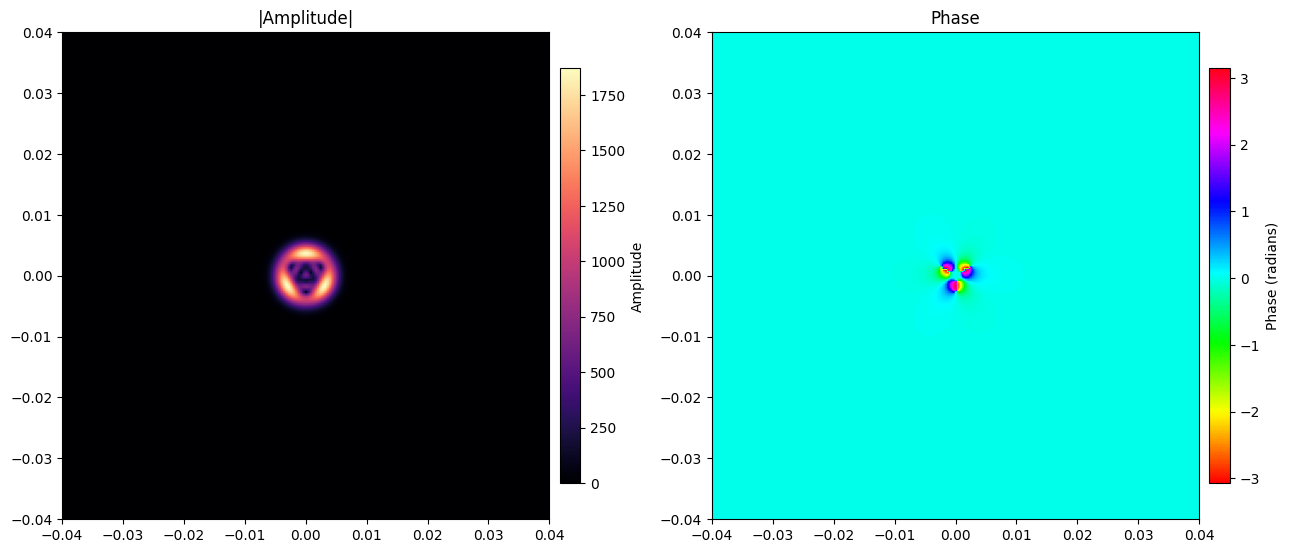

In [108]:
plot_field_both(field, extend=extend)

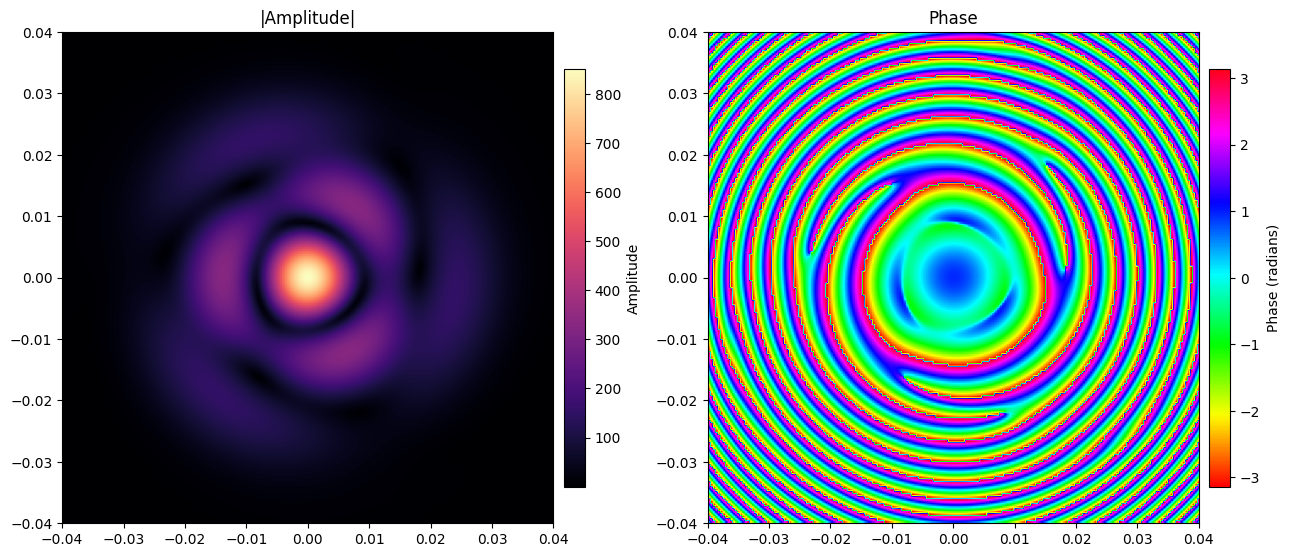

In [109]:
# Denis
C00 = 1.51
C01 = -5.06
C02 = 7.23
C03 = -2.04
C30 = -3.97
C_31 = 0
z0 = 150
field_z0 = (
    C00 * LG_simple(*mesh_2D, z0=z0, l=0, p=0, width=width0, k0=k0) +
    C01 * LG_simple(*mesh_2D, z0=z0, l=0, p=1, width=width0, k0=k0) +
    C02 * LG_simple(*mesh_2D, z0=z0, l=0, p=2, width=width0, k0=k0) +
    C03 * LG_simple(*mesh_2D, z0=z0, l=0, p=3, width=width0, k0=k0) +
    C30 * LG_simple(*mesh_2D, z0=z0, l=3, p=0, width=width0, k0=k0) +
    C_31 * LG_simple(*mesh_2D, z0=z0, l=-3, p=1, width=width0, k0=k0)
)
plot_field_both(field_z0, extend=extend)

In [110]:
print(f"Raleigh range: {(k0 * (width0 / 10) ** 2)}")

Raleigh range: 0.2233359706343455


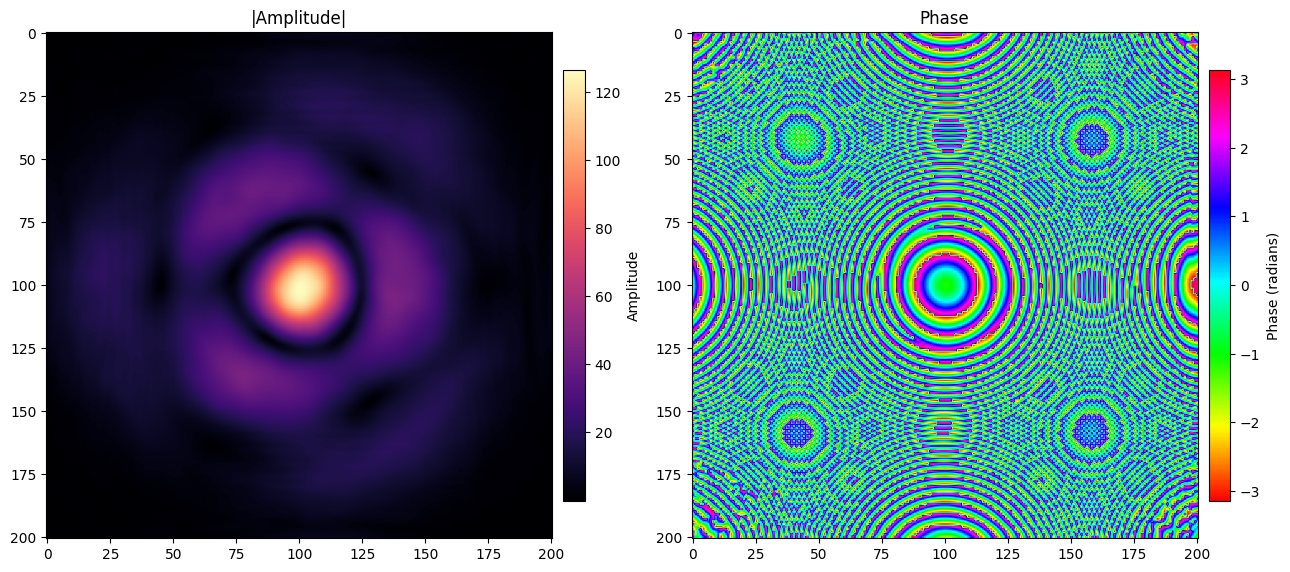

In [121]:
def propagation_ps(beam_2D, beam_par, psh_par, L_prop, screens_num=1):
	l, p, width0, lmbda = beam_par
	r0, res_xy_2D, pxl_scale, L0, l0 = psh_par
	k0 = 2 * np.pi / lmbda
	Cn2 = Cn2_from_r0(r0, k0, L_prop)
	dL = L_prop / screens_num
	r0 = r0_from_Cn2(Cn2=Cn2, k0=k0, dz=dL)
	psh_par_dL = r0, res_xy_2D, pxl_scale, L0, l0
	E = beam_2D
	for i in range(screens_num):
		phase_screen_i = psh_wrap(psh_par_dL)
		E = opticalpropagation.angularSpectrum(
			E * np.exp(1j * phase_screen_i), lmbda, pxl_scale, pxl_scale * 1.2, dL
		)
	return E

field_z = propagation_ps(field_z0, beam_par, psh_par, L_prop, screens_num=10)
plot_field_both(field_z, extend=None)